
# Programming with Python

## Episode 6 - Creating Functions

Teaching: 30 min, 
Exercises: 30 min


*How can I define new functions? What’s the difference between defining and calling a function? What happens when I call a function?*

## Objectives

- Define a function that takes parameters.
- Return a value from a function.
- Test and debug a function.
- Set default values for function parameters.
- Explain why we should divide programs into small, single-purpose functions.

## Functions

At this point, we’ve written code to draw some interesting features in our inflammation data, loop over all our data files to quickly draw these plots for each of them, and have Python make decisions based on what it sees in our data. But, our code is getting pretty long and complicated; what if we had thousands of datasets, and didn’t want to generate a figure for every single one? Commenting out the figure-drawing code is a nuisance. Also, what if we want to use that code again, on a different dataset or at a different point in our program? Cutting and pasting it is going to make our code get very long and very repetitive, very quickly. 

We’d like a way to package our code so that it is easier to reuse, and Python provides for this by letting us define things called *functions* — a shorthand way of re-executing longer pieces of code.

Let’s start by defining a function `fahr_to_celsius` that converts temperatures from Fahrenheit to Celsius:
```
def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))
```

In [5]:
def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))

### The Blueprint for a Python Function

The function definition opens with the keyword def followed by the name of the function (fahr_to_celsius) and a parenthesized list of parameter names (temp). The body of the function — the statements that are executed when it runs — is indented below the definition line. The body concludes with a return keyword followed by the return value.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a return statement to send a result back to whoever asked for it.

Let’s try running our function.
```
fahr_to_celsius(32)
```

In [6]:
fahr_to_celsius(32)

0.0

This command called our function, using “32” as the input and return the function value.

In fact, calling our own function is no different from calling any other function:
```
print('freezing point of water:', fahr_to_celsius(32), 'C')
print('boiling point of water:', fahr_to_celsius(212), 'C')
```

In [7]:
print('freezing point of water:', fahr_to_celsius(32), 'C')
print('boiling point of water:', fahr_to_celsius(212), 'C')

freezing point of water: 0.0 C
boiling point of water: 100.0 C


### Composing Functions
Now that we’ve seen how to turn Fahrenheit into Celsius, we can also write the function to turn Celsius into Kelvin:
```
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15
```

In [8]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

and now call it:
```
print('freezing point of water in Kelvin:', celsius_to_kelvin(0))
```

In [12]:
print('freezing point of water in Kelvin:', celsius_to_kelvin(0))

freezing point of water in Kelvin: 273.15


What about converting Fahrenheit to Kelvin? We could write out the formula, but we don’t need to. Instead, we can compose the two functions we have already created:
```
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k
```

In [13]:
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

```
print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))
```

See if you can now convert the freezing point of water in Farhreheit (32 degrees) to degreess Kelvin:

In [14]:
print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))

boiling point of water in Kelvin: 373.15


This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-larger chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.

### Tidying up
Now that we know how to wrap bits of code up in functions, we can make our inflammation analysis easier to read and easier to reuse. First, let’s make an `analyze` function that generates our plots:
```
def analyze(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()
```

In [16]:
import matplotlib.pyplot
def analyze(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

and another function called `detect_problems` that checks for those systematic problems we noticed:
```
import numpy
import matplotlib.plt

def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif numpy.sum(numpy.min(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')
        
```

In [17]:
import numpy
import matplotlib.plt

def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif numpy.sum(numpy.min(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

ModuleNotFoundError: No module named 'matplotlib.plt'

and now let test our functions:
```
analyze('data/inflammation-01.csv')
detect_problems('data/inflammation-01.csv')
```

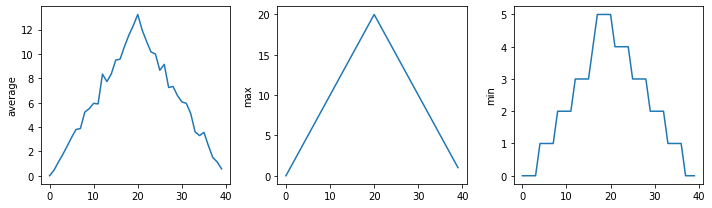

NameError: name 'detect_problems' is not defined

In [18]:
analyze('data/inflammation-01.csv')
detect_problems('data/inflammation-01.csv')

Now, rather than jumbling this code together in one giant for loop, we can now read and reuse both chunks separately. We can reproduce the previous analysis with a much simpler for loop:
```
import glob

filenames = sorted(glob.glob('data/inflammation*.csv'))

for f in filenames[:3]:
    print(f)
    analyze(f)
    detect_problems(f)
```

data/inflammation-01.csv


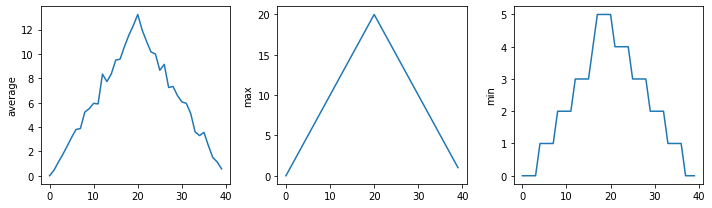

NameError: name 'detect_problems' is not defined

In [19]:
import glob

filenames = sorted(glob.glob('data/inflammation*.csv'))

for f in filenames[:3]:
    print(f)
    analyze(f)
    detect_problems(f)


By giving our functions human-readable names, we can more easily read and understand what is happening in the for loop. Even better, if at some later date we want to use either of those pieces of code again, we can do so in a single line.

### Testing and Documenting
Once we start putting things in functions so that we can re-use them, we need to start testing that those functions are working correctly. To see how to do this, let’s write a function to offset a dataset so that it’s mean value shifts to a user-defined value:
```
def offset_mean(data, target_mean_value):
    return (data - numpy.mean(data)) + target_mean_value
```

In [17]:
def offset_mean(data, target_mean_value):
    return (data - numpy.mean(data)) + target_mean_value

We could test this on our actual data, but since we don’t know what the values ought to be, it will be hard to tell if the result was correct. Instead, let’s use NumPy to create a matrix of 0’s and then offset its values to have a mean value of 3:
```
z = numpy.zeros((2,2))
print(offset_mean(z, 3))
```

In [18]:
z = numpy.zeros((2,2))
print(offset_mean(z, 3))

[[3. 3.]
 [3. 3.]]


That looks right, so let’s try offset_mean on our real data:
```
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print(offset_mean(data, 0))
```

In [20]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print(offset_mean(data, 0))

[[-6.14875 -6.14875 -5.14875 ... -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ... -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ... -4.14875 -5.14875 -5.14875]
 ...
 [-6.14875 -5.14875 -5.14875 ... -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ... -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ... -5.14875 -5.14875 -6.14875]]


It’s hard to tell from the default output whether the result is correct, but there are a few simple tests that will reassure us:
```
print('original min, mean, and max are:', 
      numpy.min(data), 
      numpy.mean(data), 
      numpy.max(data))

offset_data = offset_mean(data, 0)
print('offset   min, mean, and max are:',
      numpy.min(offset_data),
      numpy.mean(offset_data),
      numpy.max(offset_data))
```

In [22]:
print('original min, mean, and max are:', 
      numpy.min(data), 
      numpy.mean(data), 
      numpy.max(data))

offset_data = offset_mean(data, 0)
print('offset   min, mean, and max are:',
      numpy.min(offset_data),
      numpy.mean(offset_data),
      numpy.max(offset_data))

original min, mean, and max are: 0.0 6.14875 20.0
offset   min, mean, and max are: -6.14875 2.842170943040401e-16 13.85125


That seems almost right: the original mean was about 6.1, so the lower bound from zero is now about -6.1. The mean of the offset data isn’t quite zero — we’ll explore why not in the challenges — but it’s pretty close. 

Let just see what that looks like on a plot:
```
plot = matplotlib.pyplot.plot(numpy.mean(data, axis=0))
plot = matplotlib.pyplot.plot(numpy.mean(offset_data, axis=0))
```

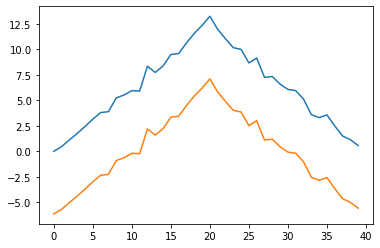

In [25]:
plot = matplotlib.pyplot.plot(numpy.mean(data, axis=0))
plot = matplotlib.pyplot.plot(numpy.mean(offset_data, axis=0))


We can even go further and check that the standard deviation hasn’t changed:
```
print('std dev before and after:', numpy.std(data), numpy.std(offset_data))
```

Those values look the same, but we probably wouldn’t notice if they were different in the sixth decimal place. Let’s do this instead:
```
print('difference in standard deviations before and after:',
      numpy.std(data) - numpy.std(offset_data))
```

Again, the difference is very small. It’s still possible that our function is wrong, but it seems unlikely enough that we should probably get back to doing our analysis. 

### Document
We have one more task first, though: we should write some documentation for our function to remind ourselves later what it’s for and how to use it.

The usual way to put documentation in software is to add comments like this:
```
# offset_mean(data, target_mean_value):
# return a new array containing the original data with its mean offset to match the desired value.
def offset_mean(data, target_mean_value):
    return (data - numpy.mean(data)) + target_mean_value
```

There’s a better way, though. If the first thing in a function is a string that isn’t assigned to a variable, that string is attached to the function as its documentation:

```
def offset_mean(data, target_mean_value):
    '''Return a new array containing the original data
       with its mean offset to match the desired value.'''
    return (data - numpy.mean(data)) + target_mean_value
```

In [26]:
def offset_mean(data, target_mean_value):
    '''Return a new array containing the original data
       with its mean offset to match the desired value.
       Example: offset_mean([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - numpy.mean(data)) + target_mean_value

This is better because we can now ask Python’s built-in help system to show us the documentation for the function:
```
help(offset_mean)
```

In [27]:
help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    Return a new array containing the original data
    with its mean offset to match the desired value.



### Defining Defaults
We have passed parameters to functions in two ways: directly, as in 
`type(`**`data`**`)`, 
and by name, as in 
`numpy.loadtxt(` ** `fname='something.csv'` **`, delimiter=',')`. 

In fact, we can pass the filename to loadtxt without the `fname=`:
```
numpy.loadtxt('data/inflammation-01.csv', delimiter=',')
```

In [29]:
numpy.loadtxt('data/inflammation-01.csv', delimiter=',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

but we still need to say delimiter=:
```
numpy.loadtxt('data/inflammation-01.csv', ',')
```

To understand what’s going on, and make our own functions easier to use, let’s re-define our offset_mean function like this:
```
def offset_mean(data, target_mean_value=0.0):
    '''Return a new array containing the original data with its mean offset to match the
       desired value (0 by default).
    Example: offset_mean([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - numpy.mean(data)) + target_mean_value
```

In [7]:
def offset_mean(data, target_mean_value=0.0):
    '''Return a new array containing the original data with its mean offset to match the
       desired value (0 by default).
    Example: offset_mean([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - numpy.mean(data)) + target_mean_value

The key change is that the second parameter is now written `target_mean_value=0.0` instead of just `target_mean_value`. If we call the function with two arguments, it works as it did before:
```
test_data = numpy.zeros( (2,2) )
print(offset_mean(test_data, 3))
```

But we can also now call it with just a single parameter, in which case `target_mean_value` is automatically assigned the default value of `0.0`:
```
more_data = 5 + numpy.zeros((2, 2))
print('data before mean offset:')
print(more_data)
print('offset data:')
print(offset_mean(more_data))
```

This is handy: if we usually want a function to work one way, but occasionally need it to do something else, we can allow people to pass a parameter when they need to but provide a default to make the normal case easier. The example below shows how Python matches values to parameters:
```
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('display() - no parameters:')
display()
print('display(55) - one parameter:')
display(55)
print('display(55, 66) - two parameters:')
display(55, 66)
```

As this example shows, parameters are matched up from left to right, and any that haven’t been given a value explicitly get their default value. We can override this behavior by naming the value as we pass it in:
```
print('display(c=77) - only setting the value of c:')
display(c=77)
```

With that in understanding, let’s look at the help for numpy.loadtxt:
```
help(numpy.loadtxt)
```

There’s a lot of information here, but the most important part is the first couple of lines:

*```
loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, use
cols=None, unpack=False, ndmin=0, encoding='bytes')
```*


This tells us that `loadtxt` has one parameter called `fname` that doesn’t have a default value, and eight others that do. 

If we call the function like this:
```
numpy.loadtxt('inflammation-01.csv', ',')
```
then the filename is assigned to `fname` - the first parameter (which is what we want), 
and the string `','` is assigned to `dtype` - the second parameter (which is **not** what we want).

Moreover, because `','` isn’t a known `dtype`, so our code produces an error message when we try to run it. 

So if we want the `','` to be assigned to the parameter `delimiter`, we have to explicity specify `delimiter=`.

So, if we wanted we could also specify the `fname` parameter out of order:
```
numpy.loadtxt(delim=',', fname='inflammation-01.csv')
```


### Readable functions

Consider these two functions Σ:
```
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))
```

The functions `s` and `std_dev` are computationally equivalent (they both calculate `sample`'s standard deviation), but to a human reader, they look very different. You probably found `std_dev` much easier to read and understand than `s`.

As this example illustrates, both documentation and a programmer’s coding style combine to determine how easy it is for others to read and understand the programmer’s code. Choosing meaningful variable names and using blank spaces to break the code into logical “chunks” are helpful techniques for producing readable code. This is useful not only for sharing code with others, but also for the original programmer. If you need to revisit code that you wrote months ago and haven’t thought about since then, you will appreciate the value of readable code!

## Exercises

### Combining Strings
*Adding* two strings produces their concatenation: `a` + `b` is `ab`.

Write a function called fence that takes two parameters called original and wrapper and returns a new string that has the wrapper character at the beginning and end of the original. A call to your function should look like this:
```
print(fence('some text', '|'))
```
should produce:
```
|some text|
```

### `return` versus `print`
Note that `return` and `print` are not interchangeable. 
`print` is a Python function that prints data to the screen. 
It enables us, users, see the data. 
`return` , on the other hand, makes data available to the calling program. 

Let’s have a look at the following function:
```
def add(a, b):
    print(a + b)
```

Question: What will we see if we execute the following commands?
```
A = add(7, 3)
print(A)
```

### Selecting Characters From Strings

If the variable `s` refers to a string, then `s[0]` is the string’s first character and `s[-1]` is its last. 
Write a function called `outer` that returns a string made up of just the first and last characters of its input. 

A call to your function should look like this:
```
print(outer('helium'))
```
and produce:
```
hm
```

### Rescaling an Array

Write a function `rescale` that takes an array as input and returns a corresponding array of values that are scaled to lie in the range 0.0 to 1.0. 

Hint: If L and H are the lowest and highest values in an array A, then the *rescaled* array would be *(A-L) / (H-L)*.

### Testing and Documenting Your Function
Run the commands `help(numpy.arange)` and `help(numpy.linspace)` to see how to use these functions to generate regularly-spaced values, then use those values to test your rescale function. Once you’ve successfully tested your function, add a docstring that explains what it does.

Then make sure you can explain the following examples:
```
rescale(numpy.arange(10.0))
rescale(numpy.linspace(0, 100, 5))
```

### Defining Defaults
Rewrite the `rescale` function so that it scales data to lie between 0.0 and 1.0 by default, but will allow the caller to specify lower and upper bounds if they want. Compare your implementation to your neighbor’s: do the two functions always behave the same way?

Here's a starting point:
````
def rescale(input_array, min=0.0, max=1.0):
    '''rescales input array values to lie between low_val and high_val'''
    
    # find upper and lower bounds
    L = numpy.min(input_array)
    H = numpy.max(input_array)
    
    # rescale to value between 0 and 1
    intermed_array = (input_array - L) / (H - L)
    
    # rescale again to from between 0 & 1 to between min & max (scale factor: max-min, offset: min)
    output_array = 
    return output_array
```

### Variables Inside and Outside Functions
What does the following piece of code display when run — and why?
```
f = 0
c = 0

def f2c(f):
    c = (f-32)*(5.0/9.0)
    return c

f2c(8)
f2c(41)
f2c(32)

print(c)
```

Why: 

### Mixing Default and Non-Default Parameters

Given the following code:
```
def numbers(one, two=2, three, four=4):
    n = str(one) + str(two) + str(three) + str(four)
    return n

print(numbers(1, three=3))
```
what do you expect will be printed? 

1. 1234
2. one2three4
3. 1239
4. SyntaxError

What is actually printed? What rule do you think Python is following?


Given that, which of the following what does thiscode:
```
def func(a, b=3, c=6):
    print(
        'a: ', a, 
        'b: ', b, 
        'c:', c)

func(-1, 2)
```
display when run?

```
a: b: 3 c: 6
a: -1 b: 3 c: 6
a: -1 b: 2 c: 6
a: b: -1 c: 2
```

### The Old Switcheroo
Consider this code:
```
a = 3
b = 7

def swap(a, b):
    temp = a
    a = b
    b = temp

swap(a, b)

print('a:', a, 'b:', b)
```
Which of the following would be printed if you were to run this code? Why did you pick this answer?
```
a:7 b:3
a:3 b:7
a:3 b:3
a:7 b:7
```


### Readable Code
Revise a function you wrote for one of the previous exercises to try to make the code more readable. Then, collaborate with one of your neighbors to critique each other’s functions and discuss how your function implementations could be further improved to make them more readable.

## Key Points
- Define a function using `def function_name(parameter):`
- The body of a function must be indented
- Call a function using `function_name(value)`
- Numbers are stored as integers or floating-point numbers
- Variables defined within a function can only be seen and used within the body of the function
- If a variable is not defined within the function it is used, Python looks for a definition before the function call
- Use `help(thing)` to view help for something
- Put docstrings in functions to provide help for that function
- Specify default values for parameters when defining a function using name=value in the parameter list
- Parameters can be passed by matching based on name, by position, or by omitting them (in which case the default value is used)
- Put code whose parameters change frequently in a function, then call it with different parameter values to customize its behavior

### Save, and version control your changes

- save your work: `File -> Save`
- add all your changes to your local repository: `Terminal -> git add .`
- commit your updates a new Git version:  `Terminal -> git commit -m "End of Episode 2"`
- push your lastest commits to GitHub: `Terminal -> git push`